In [1]:
import sys
sys.path.append('..')

# standard
import json
from collections import defaultdict
import pandas as pd
import numpy as np
import seaborn as sns
from statistics import median
from statistics import mean
from matplotlib import pyplot as plt
from sklearn import metrics
import matplotlib.ticker as ticker
from scipy import stats

# my lib
import PPILinkPred as pred
import genData_helper as helper
import traversalHelper as tr
import bioGRID
import STRING
import MINT
import HuRI

In [2]:
colors = {
    "L3E_f1": "tab:blue",
    "L3E_f2": "tab:olive",
    "L3": "tab:orange",
    "CN": "tab:green",
    "CRA": "tab:red",
    "CH2": "tab:brown",
    "Sim": "tab:purple",
    "rand": "tab:grey"
}

methods = ["commonNeighbor", "L3Normalizing", "CRA", "Sim", "CH2_L3", "random"]+["L3E1_{}".format(i) for i in ['f1', 'f2']]
methods_map = ["CN", "L3", "CRA", "Sim", "CH2", "rand"]+["L3E_{}".format(i) for i in ['f1', 'f2']]
abbrev_map = ["CN", "L3", "CRA", "Sim", "CH2", "rand"]+["L3E\n($f_{"+str(i)+"}$)" for i in range(1,3)]
label_map = ["CN", "L3", "CRA", "Sim", "CH2", "rand"]+["L3E($f_{"+str(i)+"}$)" for i in range(1,3)]

methods_names = dict(zip(methods, methods_map))
abbrevs = dict(zip(methods_map, abbrev_map))
labels = dict(zip(methods_map, label_map))

# generate data

using the script score_realPPIs_HPC.py and score_realNonPPIs_HPC.py in the same directory

# read result data raw & df

In [ ]:
dss = ['bioGRID_human', 'STRING_human', 'MINT_human', 'HuRI']
methods = ["commonNeighbor", "L3Normalizing", "CRA", "CH2_L3", "Sim"]+["L3E1_{}".format(i) for i in ['f1', 'f2']]

predScores = {}
for ds in dss:
    predScores[ds] = {}
    for method in methods:
        with open("ppiScoring_out/{}_{}_score.json".format(method, ds), 'r') as f:
            predScores[ds][method] = np.asarray(sorted(json.loads(f.read())))

nonPredScores = {}
for ds in dss:
    nonPredScores[ds] = defaultdict(list)
    for method in methods:
        for i in range(10):
                with open("ppiScoring_out/{}_{}_nonPPI_score_{}.json".format(method, ds, i), 'r') as f:
                    nonPredScores[ds][method].append(np.asarray(sorted(json.loads(f.read()))))

In [ ]:
nonPredScores_df = defaultdict(list)
for ds in nonPredScores:
    for method in nonPredScores[ds]:
        maxScore = np.max(predScores[ds][method])
        for trial in range(10):
            for i in range(len(nonPredScores[ds][method][trial])):
                nonPredScores_df['ds'].append(ds)
                nonPredScores_df['method'].append(methods_names[method])
                nonPredScores_df['trial'].append(trial)
                nonPredScores_df['score'].append(nonPredScores[ds][method][trial][i])
                nonPredScores_df['normScore'].append(nonPredScores[ds][method][trial][i]/maxScore)
nonPredScores_df = pd.DataFrame(nonPredScores_df)

predScores_df = defaultdict(list)
for ds in predScores:
    for method in predScores[ds]:
        maxScore = np.max(predScores[ds][method])
        for i in range(len(predScores[ds][method])):
            predScores_df['ds'].append(ds)
            predScores_df['method'].append(methods_names[method])
            predScores_df['score'].append(predScores[ds][method][i])
            predScores_df['normScore'].append(predScores[ds][method][i]/maxScore)
predScores_df = pd.DataFrame(predScores_df)

In [29]:
predScores_df[['ds', 'method', 'score']].groupby(['ds', 'method']).describe()

score                                         \
                         count          mean            std       min   
ds            method                                                    
HuRI          CH2      51127.0   1325.932061    2385.582857  2.000000   
              CN       51127.0      3.515129       7.365078  0.000000   
              CRA      51127.0      0.256194       1.525924  0.000000   
              L3       51127.0      7.433227       7.217727  0.482863   
              L3E_f1   51127.0     14.646588      31.897030  1.000000   
              L3E_f2   51127.0      2.675121       5.407382  1.000000   
              Sim      51127.0     10.274724       9.828156  2.000000   
MINT_human    CH2      22324.0   4667.530370   12269.323409  2.000000   
              CN       22324.0      1.121170       4.461160  0.000000   
              CRA      22324.0      0.077352       0.677272  0.000000   
              L3       22324.0      7.351770       7.248950  0.484012   
              L3E_f1   22324.0     46.968002      86.966411  1.000000   
              L3E_f2   22324.0     12.381098      33.853102  1.000000   
              Sim      22324.0     32.506958      63.967485  2.000000   
STRING_human  CH2     308614.0  63442.024222  108160.728393  2.000000   
              CN      308614.0     48.612134      53.651735  0.000000   
              CRA     308614.0     20.964693      33.378050  0.000000   
              L3      308614.0     43.907202      42.038715  0.423739   
              L3E_f1  308614.0   1309.822235    2512.185749  1.000000   
              L3E_f2  308614.0    389.592897     746.464670  1.000000   
              Sim     308614.0     65.321909      64.294618  2.000000   
bioGRID_human CH2     452684.0  11430.134292   24462.561746  2.000000   
              CN      452684.0     15.774454      28.388675  0.000000   
              CRA     452684.0      1.403341       5.283249  0.000000   
              L3      452684.0     16.264169      23.768436  0.367201   
              L3E_f1  452684.0     48.533834     156.102411  1.000000   
              L3E_f2  452684.0      7.466711      32.156743  1.000000   
              Sim     452684.0     21.820193      34.097147  2.000000   

                                                                             
                              25%           50%           75%           max  
ds            method                                                         
HuRI          CH2      191.923069    538.282224   1434.021041  4.436447e+04  
              CN         0.000000      1.000000      4.000000  2.140000e+02  
              CRA        0.000000      0.000000      0.026989  7.768846e+01  
              L3         2.821245      5.032714      9.466891  1.203090e+02  
              L3E_f1     2.935742      5.858063     13.575010  1.274266e+03  
              L3E_f2     1.198693      1.466008      2.276428  1.033598e+02  
              Sim        4.741010      7.396592     12.598094  1.399152e+02  
MINT_human    CH2       90.043185    326.985917   1585.603771  7.577503e+04  
              CN         0.000000      0.000000      1.000000  3.370000e+02  
              CRA        0.000000      0.000000      0.000000  4.259273e+01  
              L3         2.651648      4.791637      9.293972  1.039603e+02  
              L3E_f1     3.670819     11.109935     39.632119  7.448465e+02  
              L3E_f2     1.344158      2.370559      7.599033  2.790991e+02  
              Sim        4.422450      8.618187     25.549803  4.427437e+02  
STRING_human  CH2     4071.298001  16094.822938  71539.155455  1.065293e+06  
              CN        10.000000     30.000000     66.750000  9.940000e+02  
              CRA        0.727334      6.113545     26.048318  5.513417e+02  
              L3        12.848392     29.976115     63.862594  5.295996e+02  
              L3E_f1    34.470823    228.253841   1296.388852  2.438598e+04  
              L3E_f2     8.668060     53.6174

## folded changes against all

In [30]:
# lets do the basic thing here, range of predScores vs nonPredScores
# do all trials' diff, mean the diff
predStats = predScores_df.groupby(['ds', 'method']).describe().reset_index()
nonPredStatss = [nonPredScores_df[nonPredScores_df['trial'] == trial].groupby(['ds', 'method', 'trial']).describe().reset_index() for trial in range(10)]
mean_diff, mean_std, samples = {}, {}, {}
methods = ["CN", "L3", "CRA", "CH2", "Sim", "L3E_f1", "L3E_f2"]

for ds in set(predStats['ds']):
    mean_diff[ds], mean_std[ds], samples[ds] = {}, {}, {}
    for method in methods:
        diffs = []
        for trial in range(10):
            diff = float(predStats[(predStats['ds'] == ds) & (predStats['method'] == method)][('score', 'mean')] / nonPredStatss[trial][
                (nonPredStatss[trial]['ds'] == ds) & (nonPredStatss[trial]['method'] == method)][('score', 'mean')])
            diffs.append(diff)
        diff, std = mean(diffs), np.std(diffs)
        mean_diff[ds][method], mean_std[ds][method], samples[ds][method] = diff, std, diffs

mean score


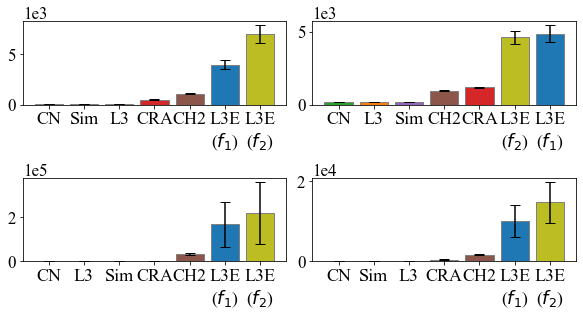

In [35]:
plt.rc('axes', titlesize=18)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=17)
plt.rc('legend', fontsize=13)
plt.rcParams["font.family"] = "Times New Roman"

print("mean score")
fig, axes = plt.subplots(2, 2, figsize=(8.2, 4.5))
for i in range(len(dss)):
    ds = dss[i]
    mean_diff[ds] = dict(sorted(mean_diff[ds].items(), key=lambda item: item[1]))
    xtick = [x for x in list(mean_diff[ds].keys())]
    axes[int(i/2),i%2].bar([abbrevs[x] for x in xtick]
          , [mean_diff[ds][x] for x in xtick], yerr=[mean_std[ds][x] for x in xtick]
          , capsize=5, edgecolor='grey', color=[colors[x] for x in xtick])
    axes[int(i/2),i%2].ticklabel_format(style='sci', scilimits=(0,0), axis='y')
    #axes[int(i/2),i%2].set_title("{}) {}".format(i+1, ds))
    #ttl = axes[i].title
    #ttl.set_position([.5, 1.05])

#axes[0].set_ylabel('Folded Scores')
plt.tight_layout()
plt.savefig("./img_experiments/allFolded.png", dpi=300)
plt.show()

In [ ]:
# p val
# sample to do: top 2 both to third, between top 2
pairss = [[['L3E_f1', 'L3E_f2'], ['L3E_f1', 'CH2']]
        , [['L3E_f1', 'L3E_f2'], ['L3E_f2', 'CRA']]
        , [['L3E_f1', 'L3E_f2'], ['CH2', 'L3E_f1']]
        , [['L3E_f1', 'L3E_f2'], ['CH2', 'L3E_f1']]
         ]
dss = ['bioGRID_human', 'STRING_human', 'MINT_human', 'HuRI']
for i in range(len(dss)):
    ds = dss[i]
    print(ds)
    for pair in pairss[i]:
        pop1 = samples[ds][pair[0]]
        pop2 = samples[ds][pair[1]]
        pVal = stats.ttest_ind(pop1, pop2)[1]
        print("{} {}: {}".format(pair[0], pair[1], pVal))